# Test NeuralNet class

In [1]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load the dataset

In [33]:
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

#store the min and the max of each column to denormalize the data later
min_max = {}
for column in df.columns:
    min_max[column] = [df[column].abs().min(), df[column].abs().max()]

# normalize all the data of the dataframe between 0 and 1
df_scaled = df.copy()

#normalize the data between 0 and 1 using the min_max dictionary
for column in df_scaled.columns:
    df_scaled[column] = 0.1 + 0.8 * (df_scaled[column] - min_max[column][0])  / (min_max[column][1] - min_max[column][0])

y = df_scaled['SalePrice'].values
X = df_scaled.drop('SalePrice', axis=1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y)


[0.59582292 0.5187076  0.63866476 ... 0.76147804 0.40624777 0.42159943]


In [34]:
nn = NeuralNet(layers=[X_train.shape[1], 64, 32, 1], function='tanh')
nn.fit(X_train, y_train)

Epoch 0/1000 - Training Error: 0.014365 - Validation Error: 0.013918
Epoch 100/1000 - Training Error: 0.004055 - Validation Error: 0.003874
Epoch 200/1000 - Training Error: 0.003970 - Validation Error: 0.003897
Epoch 300/1000 - Training Error: 0.002996 - Validation Error: 0.003036
Epoch 400/1000 - Training Error: 0.003605 - Validation Error: 0.003802
Epoch 500/1000 - Training Error: 0.002596 - Validation Error: 0.003007
Epoch 600/1000 - Training Error: 0.002795 - Validation Error: 0.003173
Epoch 700/1000 - Training Error: 0.002336 - Validation Error: 0.002751
Epoch 800/1000 - Training Error: 0.002436 - Validation Error: 0.002853
Epoch 900/1000 - Training Error: 0.002829 - Validation Error: 0.003425


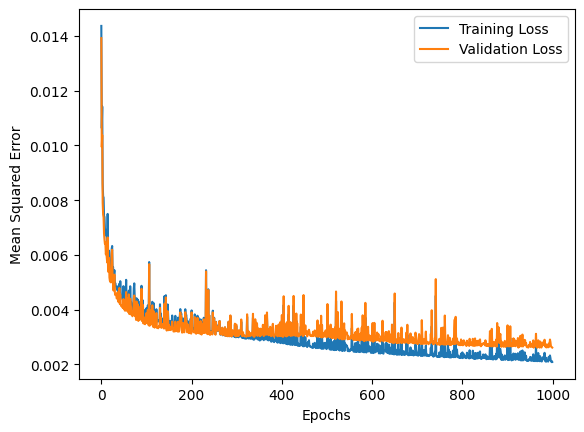

Predictions: [0.54124333 0.54012161 0.4220462  0.32853215 0.50460766 0.46791447
 0.50676928 0.62849608 0.4250245  0.31548602 0.49669048 0.38537355
 0.41843568 0.4604446  0.37829085 0.80632481 0.80675257 0.48088833
 0.49873302 0.47966362 0.33558352 0.61356923 0.44950492 0.6115227
 0.44434565 0.40289381 0.37706375 0.03725714 0.53026776 0.45847174
 0.39103295 0.45662803 0.52045893 0.33166481 0.49972678 0.75001729
 0.24989789 0.44247348 0.638394   0.245138   0.40439368 0.31299635
 0.28794243 0.43128954 0.45319174 0.15458127 0.34075301 0.38733132
 0.50626583 0.7308902  0.62033483 0.09756548 0.7753895  0.3207912
 0.37168128 0.34124259 0.28738187 0.61764118 0.34457352 0.60382566
 0.44055957 0.70203522 0.84523505 0.7058808  0.26072721 0.32775688
 0.48247531 0.57103597 0.30087788 0.50532621 0.53585437 0.68789026
 0.29579128 0.34441861 0.60349332 0.18394377 0.59531331 0.13904267
 0.56900467 0.51558746 0.4239984  0.69980841 0.39950196 0.18908885
 0.34302004 0.43226648 0.51669176 0.42418191 0.5040

In [35]:
train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
predictions = nn.predict(X_test)
print("Predictions:", predictions.flatten())

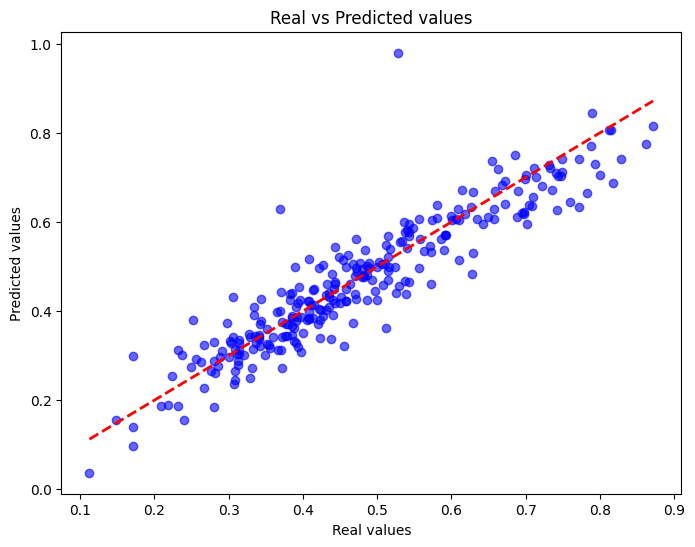

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()